# Simple Linear Regression

- Step 1: Reading and understanding the data (EDA)
- Step 2: Training the model
- Step 3: Residual analysis
- Step 4: Predicting and evaluating on the test set

## Step 1 - Reading and understanding the data (EDA)
- Import the libraries
- Load the data
- Understand the structure of data
- Understand the relationship between columns

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

Load data and read the structure

In [3]:
df = pd.read_csv("advertising.csv")
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Visualising the relationship between feature columns and Target column
In this dataset our target variable is `Sales` and predictor variables or feature variables are `TV`, `Radio`, `Newspaper`

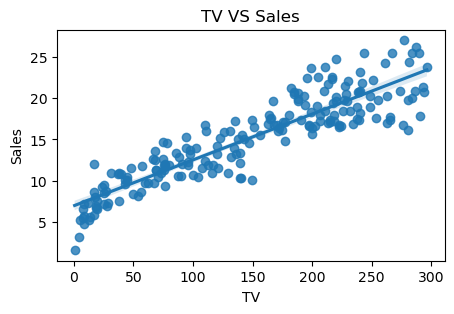

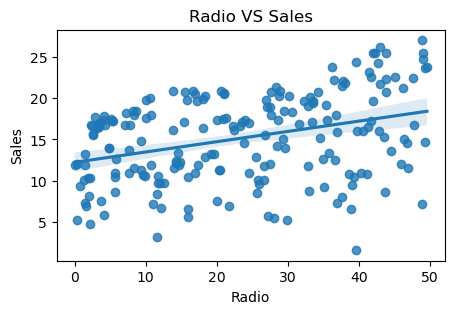

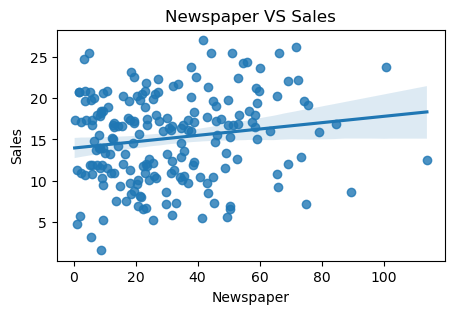

In [11]:
features_cols = ["TV", "Radio", "Newspaper"]

for col in features_cols:
    plt.figure(figsize=(5,3))
    title = col + " VS " + "Sales"
    sns.regplot(x=df[col], y=df["Sales"]).set(title=title)
    plt.show()

#### Visualising with pairplot

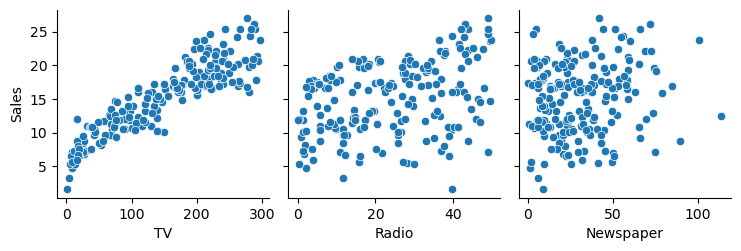

In [12]:
sns.pairplot(x_vars=["TV", "Radio", "Newspaper"], y_vars=["Sales"], data=df)
plt.show()

#### Visualising the correlation

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


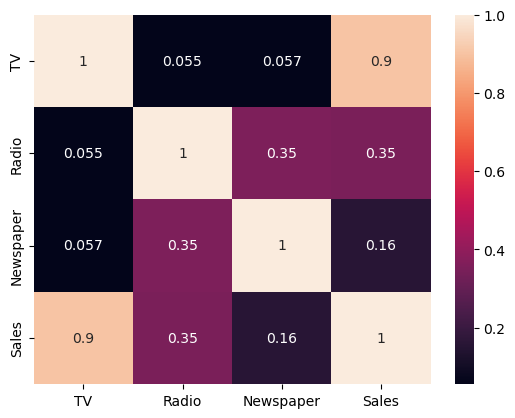

In [14]:
print(df.corr())
sns.heatmap(df.corr(), annot=True)
plt.show()

## Step 2: Training the model set (Perform a simple linear regression)

- Create X and y
- Create `train` and `test sets` (70:30 or 80:20 ratio)
- Train your model on the training set(i.e learn the coefficients)
- Evaluate the model(training set and test set)

In [18]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [17]:
# create X and y
X = df["TV"]
y = df["Sales"]

In [19]:
# train-test split
# Here we are spliting the data as 70% training data and 30% test data
# random_size value helps to make sure that the processing is done on same data always

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [21]:
# training the model
# This will add the constant to the X_train dataSet as be default statsmodel lib does not add it
# y = c + m1 . x1
# y = c.const + m1.TV

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [22]:
# fitting the model
# Note: Here on we will use X_train_sm and not X_train
# OLS -> Ordinary Least Squares

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

- y = c + m1.x1
- Sales = 6.948 + 0.054 . TV
- Coefficient of TV is +ve that means if TV ads increases then Sales will increase
- From above we see that constant is 0. It means that if TV ads is 0 then sales will be 6.948

In [23]:
# Summary of the model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.52e-52
Time:                        18:51:23   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- P>|t| -> Closer it is to zero, better it is considered to be. If p value is very low then the model is cofident. Anything below 0.001 is considered very low.
- coef -> +ve here means that if one increases then other will also increase.

Non zero coef means that there is a relationship present and a close to zero p value indicates that the model is confident on the relationship

- R squared-> R square lies between 0-1. Closer the value to 1, better is considered to be. Anything above 0.8 is considered to be good.
- Difference between R squared and Adj R squared should be between 0.05 to have confident model
- P(F-statistics) - It measures the significance of R squared value

In [24]:
# 1. coef and p-value
# 2. R-squared is 81.6%, very high
# 3. p(F-statistic)  is low => the fit is not by chance but has a relationship

In [30]:
# Predicting the y value based on Linear Regression model
y_train_pred = lr_model.predict(X_train_sm)

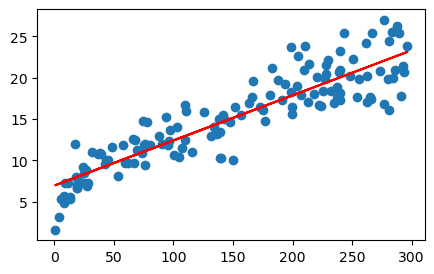

In [31]:
plt.figure(figsize=(5,3))

plt.scatter(X_train, y_train)

# y = c + m.x => c + m.TV => 6.9487 + (0.0545 * TV)
# plt.plot(X_train, 6.9487 + (0.0545 * X_train), 'r')
plt.plot(X_train, y_train_pred, 'r')

plt.show()

## Step 3: Residual Analysis

In [32]:
# calculate the residuals for the dataset

res = y_train - y_train_pred

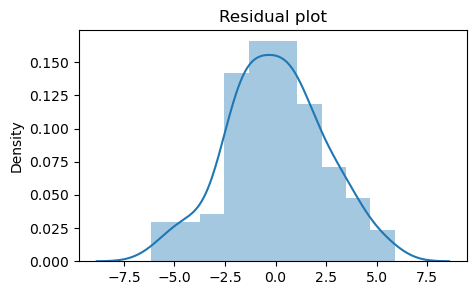

In [35]:
# plot the residuals

plt.figure(figsize=(5,3))
sns.distplot(res)
plt.title("Residual plot")
plt.show()

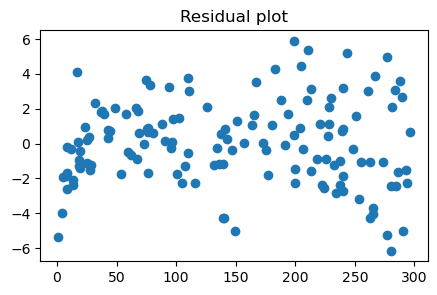

In [37]:
# plot the residuals

plt.figure(figsize=(5,3))
plt.scatter(X_train, res)
plt.title("Residual plot")
plt.show()

- Normal distribution of residuals
- Residuals are distributed mostly near 0
- No Pattern is observed
- If we draw a horizontal line in the center then dots are normally exisiting on both sides of it

## Step 4: Prediction and evaluation on the test set

- make predictions on the test set (y_test_pred)
- evaluate the model, r-squared on the test

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
# add a cons/ intercept to test
X_test_sm = sm.add_constant(X_test)

y_test_pred = lr_model.predict(X_test_sm)

In [43]:
# evaluate the model, r-squared, on the test

r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)

print("Train: ", r2_train * 100, ", Test: ", r2_test * 100, ", Train - Test: ", (r2_train - r2_test) * 100)

Train:  81.57933136480389 , Test:  79.21031601245662 , Train - Test:  2.36901535234727


#### We observe that the delta in training and test set is below 5% which is considered as very good

In [47]:
# mean squared error
print(mean_squared_error(y_true=y_test, y_pred=y_test_pred))
print(mean_squared_error(y_true=y_train, y_pred=y_train_pred))

4.077556371826948
5.752400386486836


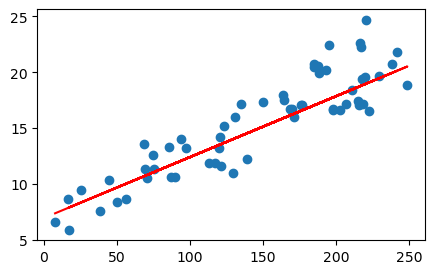

In [48]:
# Plot the graph with test data

plt.figure(figsize=(5,3))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [49]:
lr_test = sm.OLS(y_test, X_test_sm)
lr_test_model = lr_test.fit()
lr_test_model.params

const    6.726755
TV       0.059766
dtype: float64

In [50]:
lr_test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     252.2
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           8.76e-23
Time:                        20:04:23   Log-Likelihood:                -124.12
No. Observations:                  60   AIC:                             252.2
Df Residuals:                      58   BIC:                             256.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7268      0.602     11.166      0.000       5.521       7.933
TV             0.0598      0.004     15.882      0.000       0.052       0.067
==============================================================================
Omnibus:                        2.035   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.361   Jarque-Bera (JB):                1.693
Skew:                           0.264   Prob(JB):                        0.429
Kurtosis:                       2.369   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_________
_________


## Linear regression using sklearn

Steps in sklearn model building
- #1 create the Linear regression object
- #2 Fit the model
- #3 See the params, make predictions (train and test)
- #4 Evaluate (r2, etc)

In [51]:
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X, y, train_size=0.70, random_state=100)

In [52]:
#1 Create the Linear regression object

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [55]:
#2 Fit the model

X_train_sk_lm = X_train_sk.values.reshape(-1, 1)
X_test_sk_lm = X_test_sk.values.reshape(-1, 1)

lm.fit(X_train_sk_lm, y_train_sk)

LinearRegression()

In [57]:
#3 See the params
print("Coefficient: ", lm.coef_, ", Intercept: ", lm.intercept_)


# make predictions (train and test)
y_train_pred_sk = lm.predict(X_train_sk_lm)
y_test_pred_sk = lm.predict(X_test_sk_lm)

Coefficient:  [0.05454575] , Intercept:  6.948683200001357


In [58]:
#4 Evaluate (r2, etc)
print(r2_score(y_true=y_train_sk, y_pred=y_train_pred_sk))
print(r2_score(y_true=y_test_sk, y_pred=y_test_pred_sk))

0.8157933136480389
0.7921031601245662
